# <font color=blue>TITANIC - MACHINE LEARNING FROM DISASTER

## <font color=blue>Developed by Adhithia R

## Links to Various Parts of the Notebook

## <font color=green>Bookmarks to Notebook Sections
<font color=blue>1. Go to <a href=#no1>Improrting necessary libraries</a><br>
2. Go to <a href=#no2>Understanding the dataset</a><br>
3. Go to <a href=#no3>Data Cleaning</a><br>
4. Go to <a href=#no4>Data Visualization</a><br>
5. Go to <a href=#no5>Splitting the Data into Training and Testing Sets</a><br>
6. Go to <a href=#no6>Class Imbalance Treating</a><br>
7. Go to <a href=#no7>Model Building</a><br>
7.1 Go to <a href=#no8>Logistic Regression</a><br>
7.2 Go to <a href=#no9>Decision Tree Classifier</a><br>
7.3 Go to <a href=#no10>Decision Tree Classifier with Hyper Parameter Tuning</a><br>
7.4 Go to <a href=#no11>Random Forest</a><br>
7.5 Go to <a href=#no12>Random Forest with Hyper Paramter Tuning</a><br>
7.6 Go to <a href=#no13>Adaboost</a><br>
7.7 Go to <a href=#no14>GBM</a><br>
8. Go to <a href=#no15>Results</a><br>
9. Go to <a href=#no16>Developing Results for the Test Data Set Provided</a><br>

## <font color=red>1. Importing Necessary Libraries <a name='no1' />

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC 
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from collections import Counter
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report,log_loss, precision_score,recall_score,precision_recall_curve

## <font color=red>2. Understanding the dataset <a name='no2' />

In [2]:
# Loading the data
df = pd.read_csv('train.csv')

In [3]:
# Viewing the top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Viewing the shape of the dataset
df.shape

(891, 12)

In [5]:
# Viewing the info of dataype and null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Viewing the number of null entries in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <font color=red>3. Data Cleaning <a name='no3' />

### 1. Treating Null Values

In [7]:
mean_age=df['Age'].mean()
mean_age=int(round(mean_age,0))
mean_age

30

In [8]:
df['Age'].fillna(mean_age,inplace=True)

In [9]:
embark_mode=df['Embarked'].mode()
embark_mode

0    S
dtype: object

In [10]:
df['Embarked'].fillna(embark_mode,inplace=True)

### 2. Dropping Redundant Columns

In [11]:
# Dropping Name and Ticket Number
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId'])

### 3. Creating Dummy Variables

In [12]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Sex','Embarked']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df=df.drop(columns=['Sex','Embarked'])

In [13]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


## <font color=red>4. Data Visualization <a name='no4' />

In [15]:
# Calculating correlation matrix
corr_matrix = df[df.columns].corr()
# Create a dataframe for the minimum correlation coefficient values
corr_df = pd.DataFrame(corr_matrix.min())
# Rename the column label of corr_df
corr_df.columns = ['MinCorrelationCoeff']
# Calculate the maximum correlation coefficient value apart less than 1.
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
Survived,-0.543351,0.257307
Pclass,-0.549500,0.221009
Age,-0.329727,0.090632
SibSp,-0.232440,0.414838
Parch,-0.245489,0.414838
Fare,-0.549500,0.257307
Sex_male,-0.543351,0.131900
Embarked_Q,-0.496624,0.221009
Embarked_S,-0.496624,0.125722


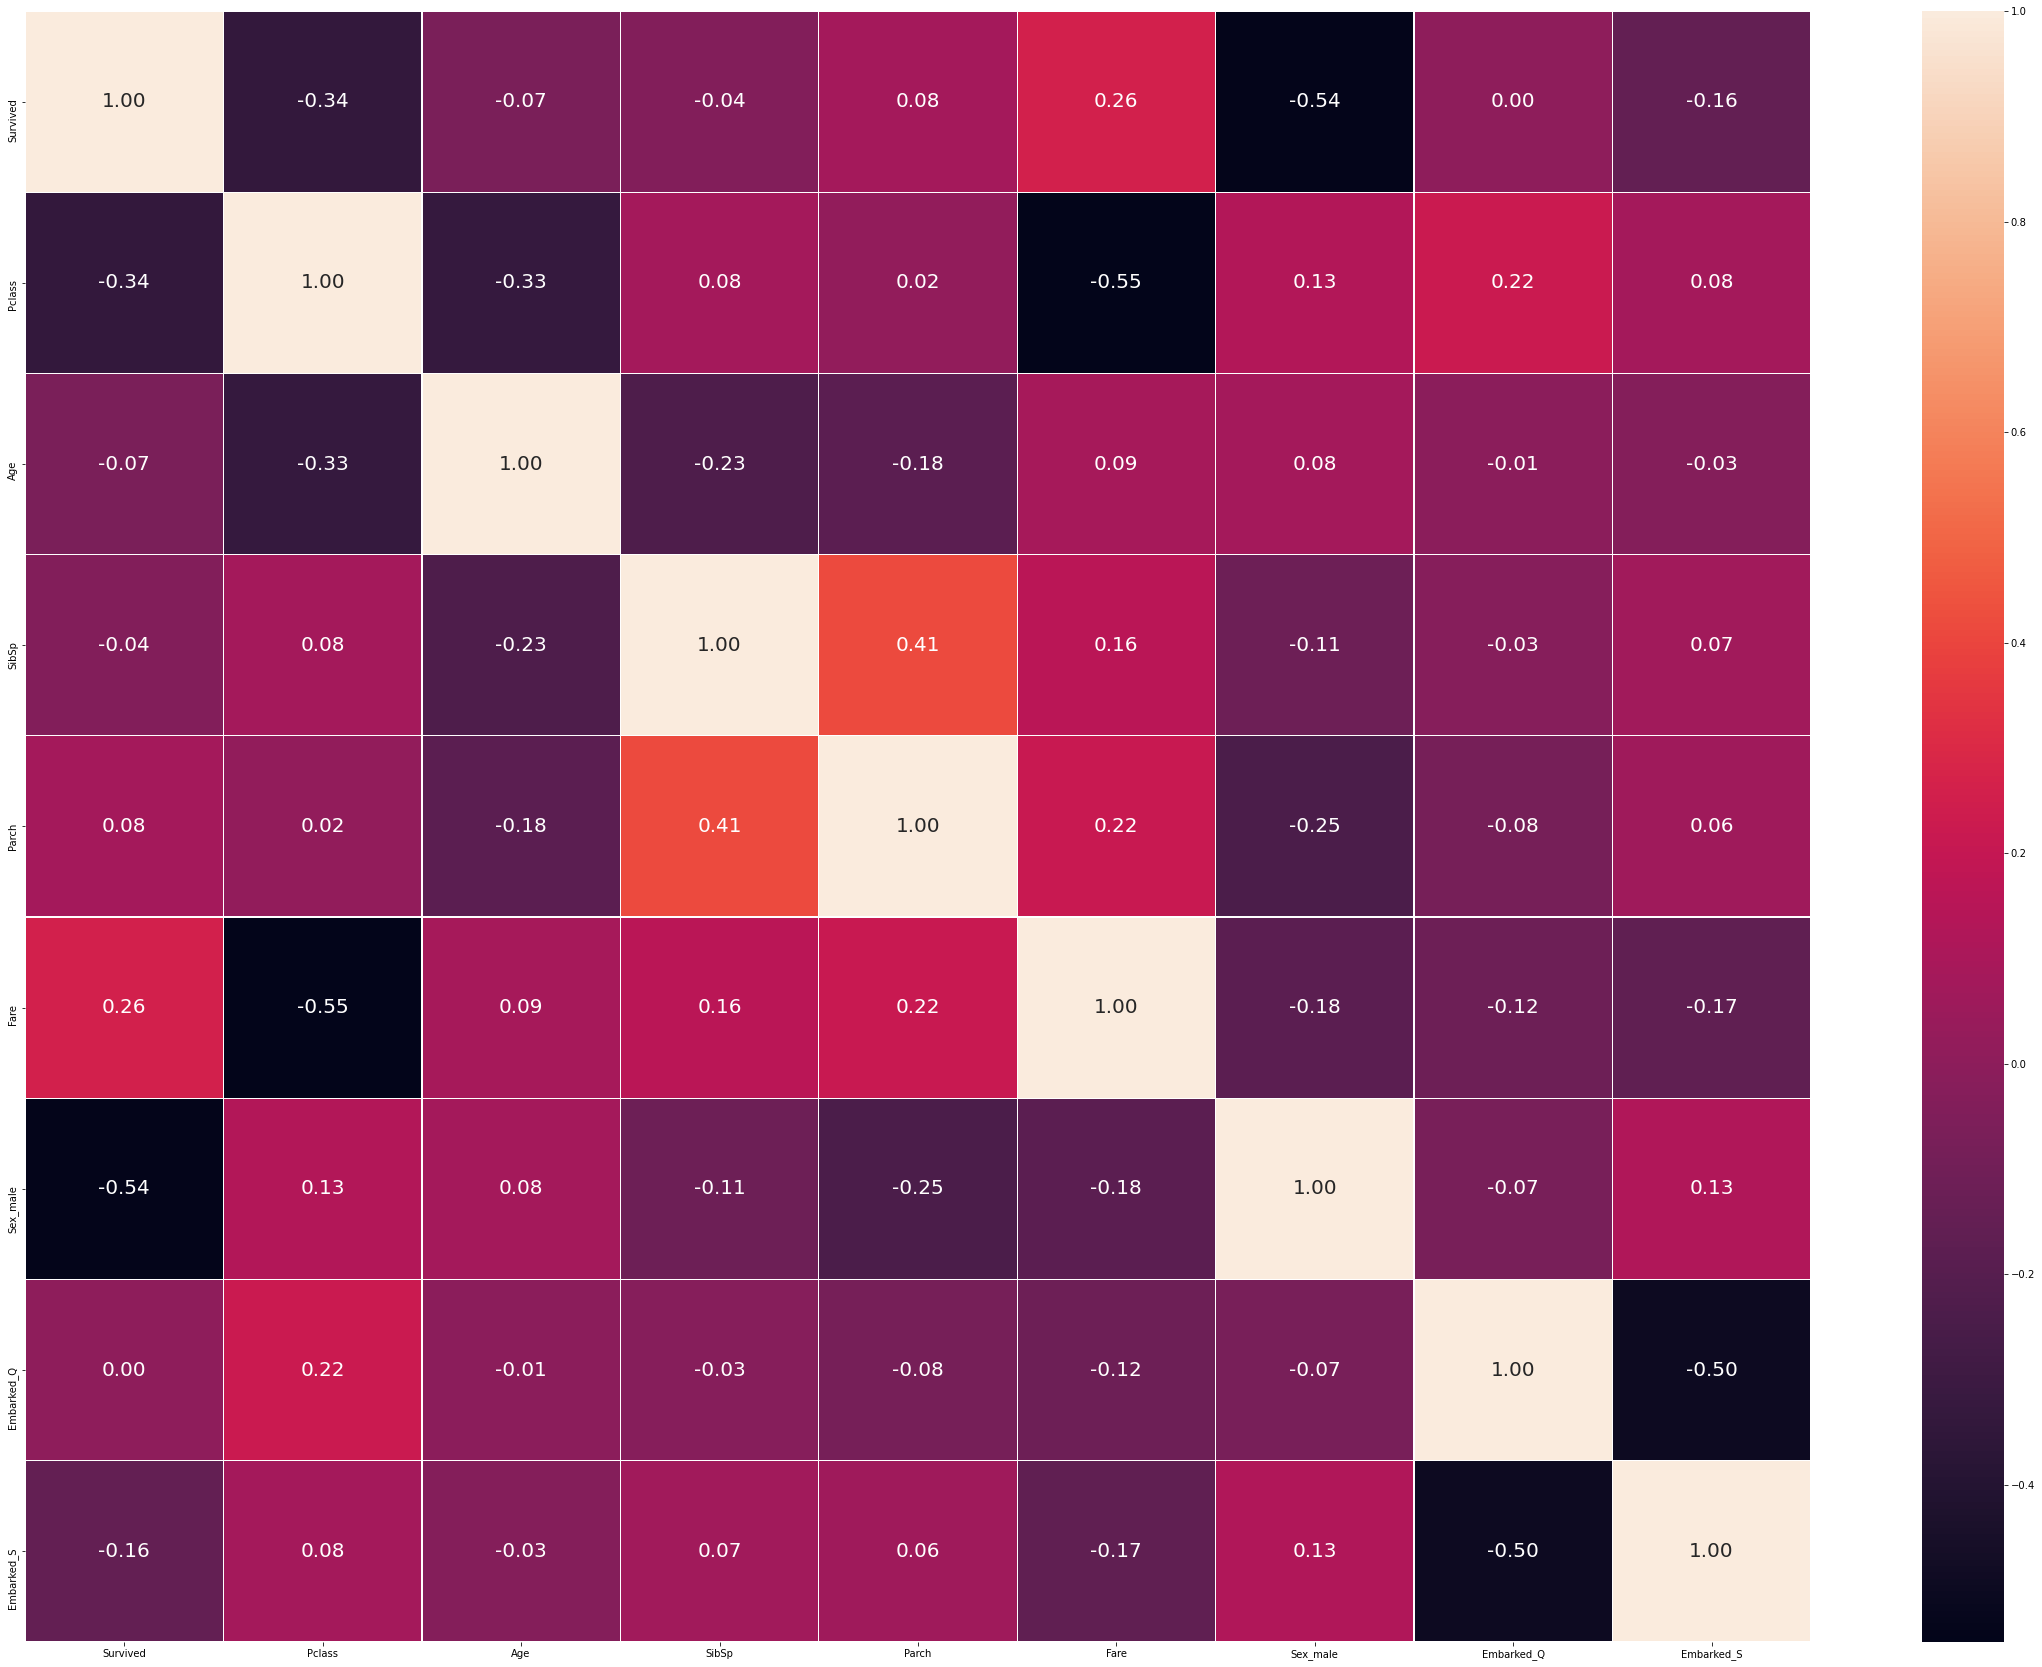

In [16]:
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f", annot_kws={"fontsize":20});

## <font color=red>5. Splitting the Data into Training and Testing <a name='no5' />

In [17]:
## Splitting Data into Train and Test
X=df.drop(columns='Survived')
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

## <font color=red>6. Class Imbalance Treating <a name='no6' />

In [18]:
counter=Counter(y_train)
print("Before",counter)

# Oversampling the training dataset using SMOTE
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

counter=Counter(y_train_sm)
print("After",counter)

Before Counter({0: 405, 1: 263})
After Counter({0: 405, 1: 405})


## <font color=red> 7. Model Building <a name='no7' />

## <font color=green> LOGISTIC REGRESSION <a name='no8' />

In [19]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  810
Model:                            GLM   Df Residuals:                      801
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.24
Date:                Thu, 01 Jul 2021   Deviance:                       680.48
Time:                        18:35:14   Pearson chi2:                     749.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8127      0.623      9.329      0.000       4.592       7.034
Pclass        -1.0139      0.154     -6.598      0.000      -1.315      -0.713
Age           -0.0386      0.009     -4.406      0.000      -0.056      -0.021
SibSp         -0.5053      0.132     -3.833      0.000      -0.764      -0.247
Parch         -0.2784      0.140     -1.982      0.047      -0.554      -0.003
Fare           0.0025      0.003      0.954      0.340      -0.003       0.008
Sex_male      -3.0362      0.220    -13.810      0.000      -3.467      -2.605
Embarked_Q    -0.2187      0.414     -0.528      0.597      -1.030       0.593
Embarked_S    -0.5709      0.255     -2.242      0.025      -1.070      -0.072
==============================================================================
"""

In [20]:
# Choosing only those columns from RFE
col = X_train_sm.columns

In [21]:
# Applying GLM
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  810
Model:                            GLM   Df Residuals:                      801
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.24
Date:                Thu, 01 Jul 2021   Deviance:                       680.48
Time:                        18:35:15   Pearson chi2:                     749.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8127      0.623      9.329      0.000       4.592       7.034
Pclass        -1.0139      0.154     -6.598      0.000      -1.315      -0.713
Age           -0.0386      0.009     -4.406      0.000      -0.056      -0.021
SibSp         -0.5053      0.132     -3.833      0.000      -0.764      -0.247
Parch         -0.2784      0.140     -1.982      0.047      -0.554      -0.003
Fare           0.0025      0.003      0.954      0.340      -0.003       0.008
Sex_male      -3.0362      0.220    -13.810      0.000      -3.467      -2.605
Embarked_Q    -0.2187      0.414     -0.528      0.597      -1.030       0.593
Embarked_S    -0.5709      0.255     -2.242      0.025      -1.070      -0.072
==============================================================================
"""

In [22]:
# Viewing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,6.23
1,Age,4.33
7,Embarked_S,4.32
5,Sex_male,2.56
6,Embarked_Q,1.60
3,Parch,1.59
4,Fare,1.58
2,SibSp,1.51


In [23]:
# Dropping High VIF column
col = col.drop('Pclass', 1)

In [24]:
# Applying GLM
X_train_sm = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  810
Model:                            GLM   Df Residuals:                      802
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -362.07
Date:                Thu, 01 Jul 2021   Deviance:                       724.13
Time:                        18:35:21   Pearson chi2:                     763.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7512      0.377      7.294      0.000       2.012       3.490
Age           -0.0189      0.008     -2.383      0.017      -0.034      -0.003
SibSp         -0.5606      0.127     -4.407      0.000      -0.810      -0.311
Parch         -0.3949      0.135     -2.924      0.003      -0.660      -0.130
Fare           0.0147      0.003      4.573      0.000       0.008       0.021
Sex_male      -3.0402      0.212    -14.309      0.000      -3.457      -2.624
Embarked_Q    -0.8193      0.400     -2.047      0.041      -1.604      -0.035
Embarked_S    -0.6287      0.244     -2.573      0.010      -1.108      -0.150
==============================================================================
"""

In [25]:
# Viewing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,3.84
6,Embarked_S,3.30
4,Sex_male,2.29
3,Fare,1.55
2,Parch,1.52
1,SibSp,1.48
5,Embarked_Q,1.24


In [26]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.193435
1    0.190846
2    0.037827
3    0.143667
4    0.173358
5    0.923474
6    0.203101
7    0.231924
8    0.228305
9    0.090726
dtype: float64

In [27]:
# Reshaping the dataset
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19343531, 0.19084609, 0.03782727, 0.14366722, 0.17335761,
       0.92347408, 0.20310081, 0.23192377, 0.22830468, 0.09072644])

In [28]:
# Renaming the column and viewing the dataset
y_train_pred_final = pd.DataFrame({'SurvivalActuals':y_train_sm.values, 'Survival_Prob':y_train_pred})
y_train_pred_final.head()

,SurvivalActuals,Survival_Prob
0,0,0.193435
1,0,0.190846
2,0,0.037827
3,1,0.143667
4,0,0.173358


In [29]:
# Creating the probability dataframe
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Survival_Prob.map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

,SurvivalActuals,Survival_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193435,1,1,0,0,0,0,0,0,0,0
1,0,0.190846,1,1,0,0,0,0,0,0,0,0
2,0,0.037827,1,0,0,0,0,0,0,0,0,0
3,1,0.143667,1,1,0,0,0,0,0,0,0,0
4,0,0.173358,1,1,0,0,0,0,0,0,0,0


In [30]:
# Creating the probability dataframe
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.SurvivalActuals, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.541975  1.000000  0.083951
0.2   0.2  0.645679  0.918519  0.372840
0.3   0.3  0.790123  0.834568  0.745679
0.4   0.4  0.796296  0.760494  0.832099
0.5   0.5  0.807407  0.753086  0.861728
0.6   0.6  0.811111  0.745679  0.876543
0.7   0.7  0.809877  0.725926  0.893827
0.8   0.8  0.788889  0.651852  0.925926
0.9   0.9  0.616049  0.249383  0.982716


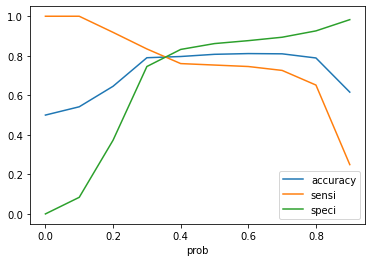

In [31]:
# Plotting the accuracy-sensitivity-specificity curve
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [32]:
# Making predictions on the train set
y_train_pred_final['final_predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.375 else 0)

# Let's see the head
y_train_pred_final.head()

,SurvivalActuals,Survival_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.193435,1,1,0,0,0,0,0,0,0,0,0
1,0,0.190846,1,1,0,0,0,0,0,0,0,0,0
2,0,0.037827,1,0,0,0,0,0,0,0,0,0,0
3,1,0.143667,1,1,0,0,0,0,0,0,0,0,0
4,0,0.173358,1,1,0,0,0,0,0,0,0,0,0


In [33]:
# Accuracy Metric
metrics.accuracy_score(y_train_pred_final.SurvivalActuals,y_train_pred_final.final_predicted)

0.7925925925925926

In [34]:
# Confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_final.SurvivalActuals,y_train_pred_final.final_predicted)
confusion

array([[332,  73],
       [ 95, 310]])

In [35]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [36]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7654320987654321

In [37]:
# Let us calculate specificity
TN / float(TN+FP)

0.8197530864197531

In [38]:
# Precision Score
precision_score(y_train_pred_final.SurvivalActuals,y_train_pred_final.final_predicted)

0.8093994778067886

In [39]:
# Recall Score
recall_score(y_train_pred_final.SurvivalActuals,y_train_pred_final.final_predicted)

0.7654320987654321

In [40]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.SurvivalActuals,y_train_pred_final.Survival_Prob)

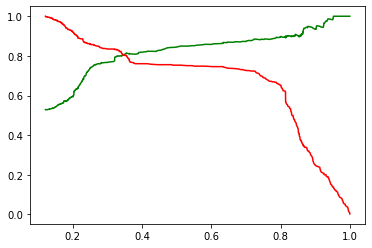

In [41]:
# Viewing the precision recall curve
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [42]:
# Transforming test set with standard scaler and predicting
X_test_logtest=X_test.copy()
X_test_logtest=X_test_logtest[col]
X_test_sm = sm.add_constant(X_test_logtest)
y_test_pred = res.predict(X_test_sm)

In [43]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Viewing the dataset
y_pred_final.head()

,Survived,0
0,0,0.350584
1,1,0.865863
2,0,0.135786
3,0,0.252907
4,1,0.872877


In [44]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survival_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Survived,Survival_Prob
0,0,0.350584
1,1,0.865863
2,0,0.135786
3,0,0.252907
4,1,0.872877


In [45]:
# Making predictions in the test set
y_pred_final['final_predicted'] = y_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.375 else 0)

# Viewing the dataset
y_pred_final.head()

,Survived,Survival_Prob,final_predicted
0,0,0.350584,0
1,1,0.865863,1
2,0,0.135786,0
3,0,0.252907,0
4,1,0.872877,1


In [46]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.8026905829596412

In [47]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[121,  23],
       [ 21,  58]])

In [48]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [49]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7341772151898734

In [50]:
# Let us calculate specificity
TN / float(TN+FP)

0.8402777777777778

## <font color=green> DECISION TREE CLASSIFIER <a name='no9' />

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
counter=Counter(y_train)
print("Before",counter)

# Oversampling the training dataset using SMOTE
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

counter=Counter(y_train_sm)
print("After",counter)

Before Counter({0: 405, 1: 263})
After Counter({0: 405, 1: 405})


In [52]:
# Creating decision tree classifier object and doing a 'fit'
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=3)

In [53]:
# Predicting using the model on train and test data
y_train_pred = dt.predict(X_train_sm)
y_test_pred = dt.predict(X_test)

In [54]:
# Function for Checking accuracy scores for train and test data and printing confusion matrix
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_sm, dt_classifier.predict(X_train_sm)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_sm, dt_classifier.predict(X_train_sm)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [55]:
# Checking accuracy scores for train and test data and printing confusion matrix
evaluate_model(dt)

Train Accuracy : 0.8407407407407408
Train Confusion Matrix:
[[365  40]
 [ 89 316]]
--------------------------------------------------
Test Accuracy : 0.8116591928251121
Test Confusion Matrix:
[[128  16]
 [ 26  53]]


In [56]:
# Confusion Matrix for Train
confusion_train=metrics.confusion_matrix(y_train_sm,dt.predict(X_train_sm))
confusion_train

array([[365,  40],
       [ 89, 316]])

In [57]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [58]:
# Let's see the sensitivity of Train Set
TP / float(TP+FN)

0.7802469135802469

In [59]:
# Let us calculate specificity of Train Set
TN / float(TN+FP)

0.9012345679012346

In [60]:
# Confusion Matrix for Test
confusion_test=metrics.confusion_matrix(y_test,dt.predict(X_test))
confusion_test

array([[128,  16],
       [ 26,  53]])

In [61]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [62]:
# Let's see the sensitivity of Test Set
TP / float(TP+FN)

0.6708860759493671

In [63]:
# Let us calculate specificity of Test Set
TN / float(TN+FP)

0.8888888888888888

In [64]:
dt.predict_proba(X_test[:5])

array([[0.64      , 0.36      ],
       [0.03167421, 0.96832579],
       [0.85808581, 0.14191419],
       [0.95454545, 0.04545455],
       [0.2704918 , 0.7295082 ]])

In [65]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, dt.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
feats_df=pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
feats_df.sort_values(by=['Importance'],ascending=False).head(5)
#feats_df.head(5)

,Feature,Importance
5,Sex_male,0.695057
4,Fare,0.123153
0,Pclass,0.095581
1,Age,0.062995
2,SibSp,0.023215


## <font color=green> Hyper-Parameter Tuning for Decision Trees <a name='no10' />

In [66]:
# Creating decision tree classifier object
dt = DecisionTreeClassifier(random_state=42)

In [67]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [68]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [69]:
%%time
# Using 'fit' with hyperparameters
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 231 ms, sys: 151 ms, total: 381 ms
Wall time: 1.87 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [70]:
# Checking the scores of the grid_search_cv
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006977,0.003622,0.001244,0.000049,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.763547,0.788177,0.841584,0.816832,0.802535,0.029392,20
1,0.007569,0.000470,0.002096,0.001119,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.763547,0.788177,0.841584,0.816832,0.802535,0.029392,20
2,0.005406,0.002407,0.002340,0.001095,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.753695,0.788177,0.836634,0.816832,0.798834,0.031240,36
3,0.008651,0.001720,0.001858,0.000538,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.753695,0.773399,0.841584,0.826733,0.798853,0.036368,24
4,0.004340,0.002191,0.001798,0.001020,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.753695,0.773399,0.841584,0.826733,0.798853,0.036368,24


In [71]:
# Checking the mean test score of top 5
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,0.002504,0.000367,0.001244,0.000391,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.817734,0.778325,0.846535,0.900990,0.835896,0.044707,1
5,0.003339,0.001833,0.001357,0.000220,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.807882,0.812808,0.836634,0.876238,0.833390,0.027022,2
20,0.003463,0.001759,0.001234,0.000368,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.812808,0.778325,0.856436,0.881188,0.832189,0.039578,3
6,0.003201,0.001097,0.001739,0.001222,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.807882,0.802956,0.836634,0.876238,0.830927,0.029151,4
30,0.001866,0.000097,0.000928,0.000020,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.802956,0.812808,0.836634,0.866337,0.829683,0.024449,5


In [72]:
# Choosing the best estimator model
grid_search.best_estimator_
dt_best = grid_search.best_estimator_

In [73]:
# Checking accuracy scores for train and test data and printing confusion matrix
evaluate_model(dt_best)

Train Accuracy : 0.8938271604938272
Train Confusion Matrix:
[[372  33]
 [ 53 352]]
--------------------------------------------------
Test Accuracy : 0.8161434977578476
Test Confusion Matrix:
[[124  20]
 [ 21  58]]


In [74]:
# Confusion Matrix for Train
confusion_train=metrics.confusion_matrix(y_train_sm,dt_best.predict(X_train_sm))
confusion_train

array([[372,  33],
       [ 53, 352]])

In [75]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [76]:
# Let's see the sensitivity of Train Set
TP / float(TP+FN)

0.8691358024691358

In [77]:
# Let us calculate specificity of Train Set
TN / float(TN+FP)

0.9185185185185185

In [78]:
# Confusion Matrix for Test
confusion_test=metrics.confusion_matrix(y_test,dt_best.predict(X_test))
confusion_test

array([[124,  20],
       [ 21,  58]])

In [79]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [80]:
# Let's see the sensitivity of Test Set
TP / float(TP+FN)

0.7341772151898734

In [81]:
# Let us calculate specificity of Test Set
TN / float(TN+FP)

0.8611111111111112

In [82]:
dt_best.predict_proba(X_test[:5])

array([[0.28571429, 0.71428571],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.6       , 0.4       ]])

In [83]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, dt_best.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
feats_df=pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
feats_df.sort_values(by=['Importance'],ascending=False).head(5)
#feats_df.head(5)

,Feature,Importance
5,Sex_male,0.521465
4,Fare,0.248428
1,Age,0.108941
0,Pclass,0.076877
2,SibSp,0.018955


## <font color=green>RANDOM FOREST <a name='no11' />

In [84]:
# Creating the random forest object
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [85]:
# Performing the 'fit'
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [86]:
# Checking accuracy scores for train and test data and printing confusion matrix
evaluate_model(rf)

Train Accuracy : 0.8345679012345679
Train Confusion Matrix:
[[372  33]
 [101 304]]
--------------------------------------------------
Test Accuracy : 0.8340807174887892
Test Confusion Matrix:
[[132  12]
 [ 25  54]]


In [87]:
# Confusion Matrix for Train
confusion_train=metrics.confusion_matrix(y_train_sm,rf.predict(X_train_sm))
confusion_train

array([[372,  33],
       [101, 304]])

In [88]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [89]:
# Let's see the sensitivity of Train Set
TP / float(TP+FN)

0.7506172839506173

In [90]:
# Let us calculate specificity of Train Set
TN / float(TN+FP)

0.9185185185185185

In [91]:
# Confusion Matrix for Test
confusion_test=metrics.confusion_matrix(y_test,rf.predict(X_test))
confusion_test

array([[132,  12],
       [ 25,  54]])

In [92]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [93]:
# Let's see the sensitivity of Test Set
TP / float(TP+FN)

0.6835443037974683

In [94]:
# Let us calculate specificity of Test Set
TN / float(TN+FP)

0.9166666666666666

In [95]:
rf.predict_proba(X_test[:5])

array([[0.65508335, 0.34491665],
       [0.14198698, 0.85801302],
       [0.66894223, 0.33105777],
       [0.72584803, 0.27415197],
       [0.43226859, 0.56773141]])

In [96]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
feats_df=pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
feats_df.sort_values(by=['Importance'],ascending=False).head(5)
#feats_df.head(5)

,Feature,Importance
5,Sex_male,0.439966
4,Fare,0.200889
0,Pclass,0.132349
7,Embarked_S,0.077187
1,Age,0.071574


## <font color=green> Hyper-Parameter Tuning for Random Forest <a name='no12' />

In [97]:
# Creating the Random Forest Object
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [98]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10],
    'min_samples_leaf': [5, 10, 20, 50],
    'max_features': [2,3,4],
    'n_estimators': [30, 50, 100]
}

In [99]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [100]:
%%time
# Apllying the 'fit'
grid_search.fit(X_train_sm,y_train_sm)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: user 344 ms, sys: 45.1 ms, total: 389 ms
Wall time: 5.85 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [30, 50, 100]},
             scoring='accuracy', verbose=1)

In [101]:
# Choosing the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [102]:
# Checking accuracy scores for train and test data and printing confusion matrix
evaluate_model(rf_best)

Train Accuracy : 0.9012345679012346
Train Confusion Matrix:
[[378  27]
 [ 53 352]]
--------------------------------------------------
Test Accuracy : 0.8295964125560538
Test Confusion Matrix:
[[129  15]
 [ 23  56]]


In [103]:
# Choosing a sample tree
sample_tree = rf_best.estimators_[0]

In [104]:
# Confusion Matrix for Train
confusion_train=metrics.confusion_matrix(y_train_sm,rf_best.predict(X_train_sm))
confusion_train

array([[378,  27],
       [ 53, 352]])

In [105]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [106]:
# Let's see the sensitivity of Train Set
TP / float(TP+FN)

0.8691358024691358

In [107]:
# Let us calculate specificity of Train Set
TN / float(TN+FP)

0.9333333333333333

In [108]:
# Confusion Matrix for Test
confusion_test=metrics.confusion_matrix(y_test,rf_best.predict(X_test))
confusion_test

array([[129,  15],
       [ 23,  56]])

In [109]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [110]:
# Let's see the sensitivity of Test Set
TP / float(TP+FN)

0.7088607594936709

In [111]:
# Let us calculate specificity of Test Set
TN / float(TN+FP)

0.8958333333333334

In [112]:
rf_best.predict_proba(X_test[:5])

array([[0.29911712, 0.70088288],
       [0.01640476, 0.98359524],
       [0.84782478, 0.15217522],
       [0.86421535, 0.13578465],
       [0.49244434, 0.50755566]])

In [113]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf_best.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
feats_df=pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
feats_df.sort_values(by=['Importance'],ascending=False).head(5)
#feats_df.head(5)

,Feature,Importance
5,Sex_male,0.498688
4,Fare,0.165863
1,Age,0.134289
0,Pclass,0.103043
2,SibSp,0.041691


## <font color=green>ADABOOST CLASSIFIER<a name='no13' />

In [114]:
# Creating the adaboost object
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=42)

In [115]:
# Applying the 'fit'
adaboost.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [116]:
# Predicting for the test data set
y_pred = adaboost.predict(X_test)

In [117]:
# Checking accuracy scores for train and test data and printing confusion matrix
evaluate_model(adaboost)

Train Accuracy : 0.8703703703703703
Train Confusion Matrix:
[[357  48]
 [ 57 348]]
--------------------------------------------------
Test Accuracy : 0.820627802690583
Test Confusion Matrix:
[[121  23]
 [ 17  62]]


In [118]:
# Confusion Matrix for Train
confusion_train=metrics.confusion_matrix(y_train_sm,adaboost.predict(X_train_sm))
confusion_train

array([[357,  48],
       [ 57, 348]])

In [119]:
# Let's see the sensitivity of Train Set
TP / float(TP+FN)

0.7088607594936709

In [120]:
# Let us calculate specificity of Train Set
TN / float(TN+FP)

0.8958333333333334

In [121]:
# Confusion Matrix for Test
confusion_test=metrics.confusion_matrix(y_test,adaboost.predict(X_test))
confusion_test

array([[121,  23],
       [ 17,  62]])

In [122]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [123]:
# Let's see the sensitivity of Test Set
TP / float(TP+FN)

0.7848101265822784

In [124]:
# Let us calculate specificity of Test Set
TN / float(TN+FP)

0.8402777777777778

In [125]:
adaboost.predict_proba(X_test[:5])

array([[0.49878281, 0.50121719],
       [0.4952257 , 0.5047743 ],
       [0.50184495, 0.49815505],
       [0.55162362, 0.44837638],
       [0.49948021, 0.50051979]])

In [126]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, adaboost.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
feats_df=pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
feats_df.sort_values(by=['Importance'],ascending=False).head(5)
#feats_df.head(5)

,Feature,Importance
4,Fare,0.585
1,Age,0.300
2,SibSp,0.035
5,Sex_male,0.025
0,Pclass,0.020


## <font color=green>GBM CLASSIFIER<a name='no14' />

In [127]:
# Creating the GBM object
gb = GradientBoostingClassifier(random_state=42)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [128]:
# Fit the model to our train and target
gb.fit(X_train_sm,y_train_sm)
# Get our predictions
gb_predictions = gb.predict(X_test)

In [129]:
# Predicting the probabilities
gb_predictions_prob = gb.predict_proba(X_test)
gb_predictions_prob

array([[0.35643043, 0.64356957],
       [0.01733129, 0.98266871],
       [0.77708246, 0.22291754],
       [0.94317259, 0.05682741],
       [0.55445449, 0.44554551],
       [0.63858844, 0.36141156],
       [0.03175358, 0.96824642],
       [0.97436321, 0.02563679],
       [0.95369081, 0.04630919],
       [0.8768349 , 0.1231651 ],
       [0.91439138, 0.08560862],
       [0.03648244, 0.96351756],
       [0.73004146, 0.26995854],
       [0.94022701, 0.05977299],
       [0.26279003, 0.73720997],
       [0.85126725, 0.14873275],
       [0.80276274, 0.19723726],
       [0.86626849, 0.13373151],
       [0.86888005, 0.13111995],
       [0.02647915, 0.97352085],
       [0.01011313, 0.98988687],
       [0.03059653, 0.96940347],
       [0.89684659, 0.10315341],
       [0.8643342 , 0.1356658 ],
       [0.18724457, 0.81275543],
       [0.90518473, 0.09481527],
       [0.57416369, 0.42583631],
       [0.14896549, 0.85103451],
       [0.8138337 , 0.1861663 ],
       [0.83552271, 0.16447729],
       [0.

In [130]:
# Checking accuracy scores for train and test data and printing confusion matrix
evaluate_model(gb)

Train Accuracy : 0.9061728395061729
Train Confusion Matrix:
[[377  28]
 [ 48 357]]
--------------------------------------------------
Test Accuracy : 0.820627802690583
Test Confusion Matrix:
[[128  16]
 [ 24  55]]


In [131]:
# Printing the classification Report
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       144
           1       0.77      0.70      0.73        79

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223



In [132]:
# Confusion Matrix for Train
confusion_train=metrics.confusion_matrix(y_train_sm,gb.predict(X_train_sm))
confusion_train

array([[377,  28],
       [ 48, 357]])

In [133]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [134]:
# Let's see the sensitivity of Train Set
TP / float(TP+FN)

0.8814814814814815

In [135]:
# Let us calculate specificity of Train Set
TN / float(TN+FP)

0.9308641975308642

In [136]:
# Confusion Matrix for Test
confusion_test=metrics.confusion_matrix(y_test,gb.predict(X_test))
confusion_test

array([[128,  16],
       [ 24,  55]])

In [137]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [138]:
# Let's see the sensitivity of Test Set
TP / float(TP+FN)

0.6962025316455697

In [139]:
# Let us calculate specificity of Test Set
TN / float(TN+FP)

0.8888888888888888

In [140]:
gb.predict_proba(X_test[:5])

array([[0.35643043, 0.64356957],
       [0.01733129, 0.98266871],
       [0.77708246, 0.22291754],
       [0.94317259, 0.05682741],
       [0.55445449, 0.44554551]])

In [141]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, gb.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
feats_df=pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
feats_df.sort_values(by=['Importance'],ascending=False).head(5)
#feats_df.head(5)

,Feature,Importance
5,Sex_male,0.529786
4,Fare,0.175370
1,Age,0.134116
0,Pclass,0.092802
2,SibSp,0.043657


## <font color=green>8. Results<a name='no15' />

In [143]:
models_pca = [['Logistic Regression',79.26,81.96,76.54,80.27,84.03,73.42], ['Decision Trees',84.07,90.12,78.02,81.17,88.89,67.09],['Decision Trees after Hyper-ParameterTuning',89.38,91.85,86.91,81.61,86.11,73.42],['Random Forest',83.46,91.85,75.06,83.41,91.67,68.35],['Random Forest after Hyper-Parameter Tuning',90.12,93.33,86.91,82.96,89.58,70.89],['Adaboost',87.04,89.58,70.89,82.06,84.03,78.48],['GBM',90.62,93.09,88.15,82.06,88.89,69.62]]
models_pca=pd.DataFrame(models_pca, columns=["Model", "Train Accuracy","Train Specificity","Train Sensitivity","Test Accuracy","Test Specificity","Test Sensitivity"])
models_pca

,Model,Train Accuracy,Train Specificity,Train Sensitivity,Test Accuracy,Test Specificity,Test Sensitivity
0,Logistic Regression,79.26,81.96,76.54,80.27,84.03,73.42
1,Decision Trees,84.07,90.12,78.02,81.17,88.89,67.09
2,Decision Trees after Hyper-ParameterTuning,89.38,91.85,86.91,81.61,86.11,73.42
3,Random Forest,83.46,91.85,75.06,83.41,91.67,68.35
4,Random Forest after Hyper-Parameter Tuning,90.12,93.33,86.91,82.96,89.58,70.89
5,Adaboost,87.04,89.58,70.89,82.06,84.03,78.48
6,GBM,90.62,93.09,88.15,82.06,88.89,69.62


## <font color=green> 9. Developing Results for the Test Data Set Provided <a name='no16' />

In [144]:
test_df=pd.read_csv("test.csv")

In [145]:
test_df.shape

(418, 11)

In [146]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [148]:
# Dropping Name and Ticket Number
test_df=test_df.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [149]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(test_df[['Sex','Embarked']], drop_first=True)

# Adding the results to the master dataframe
test_df= pd.concat([test_df, dummy1], axis=1)
test_df=test_df.drop(columns=['Sex','Embarked'])

In [150]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         332 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [152]:
mean_age=test_df['Age'].mean()
mean_age=int(round(mean_age,0))
mean_age

30

In [153]:
test_df.fillna(mean_age,inplace=True)

In [155]:
result_arr=rf_best.predict_proba(test_df)
re_dataframe = pd.DataFrame(result_arr) 

In [159]:
re_dataframe['Survived']=np.where(re_dataframe[1]>re_dataframe[0],1,0)

In [160]:
re_dataframe

,0,1,Survived
0,0.851106,0.148894,0
1,0.416836,0.583164,1
2,0.864916,0.135084,0
3,0.834292,0.165708,0
4,0.562167,0.437833,0
...,...,...,...
413,0.888670,0.111330,0
414,0.008444,0.991556,1
415,0.942918,0.057082,0
416,0.888670,0.111330,0


In [162]:
test_ids=pd.read_csv('test.csv')

In [164]:
test_ids=test_ids[['PassengerId']]

In [166]:
result_df=pd.concat([test_ids,re_dataframe], axis=1)

In [169]:
result_df=result_df[['PassengerId','Survived']]
result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [170]:
result_df.to_csv("Submission.csv",index=False)

## <font color=red>END